In [1]:
import matplotlib.pyplot as plt
import numpy as np
from snsphd import viz
import json
%config InlineBackend.figure_formats = ['svg']
Colors, palette = viz.phd_style(jupyterStyle = True, grid=True)
from pydantic import BaseModel, validator, Field
from IPython.display import JSON


In [3]:
import os
import json

directory = "..//correction//diff2//"


directory2 = "..//correction//diff3//"

dBs = []
count_rates = []



for filename in os.listdir(directory):
    if filename.endswith(".json"):
        with open(os.path.join(directory, filename), "r") as f:
            data = json.load(f)
            # print(f"Loaded data from {filename}: {data}")
            # print(f"Loaded data from {filename}")
            count_rate = data["data_stats"]["count_rate"]
            dB = float(filename.split("_")[-1][:-5])
            dBs.append(dB)
            count_rates.append(count_rate)

dBs2 = []
count_rates2 = []
for filename in os.listdir(directory2):
    if filename.endswith(".json"):
        with open(os.path.join(directory2, filename), "r") as f:
            data = json.load(f)
            # print(f"Loaded data from {filename}: {data}")
            # print(f"Loaded data from {filename}")
            count_rate = data["data_stats"]["count_rate"]
            dB = float(filename.split("_")[-1][:-5])
            dBs2.append(dB)
            count_rates2.append(count_rate)

dBs = np.array(dBs)
count_rates = np.array(count_rates)

dBs2 = np.array(dBs2)
count_rates2 = np.array(count_rates2)



dBs_sort = np.argsort(dBs)
dBs = np.flip(dBs[dBs_sort])
count_rates = np.flip(count_rates[dBs_sort])


dBs_sort2 = np.argsort(dBs2)
dBs2 = np.flip(dBs2[dBs_sort2])
count_rates2 = np.flip(count_rates2[dBs_sort2])



In [12]:
dBs2

array([100.,  98.,  96.,  94.,  92.,  90.,  88.,  86.,  84.,  82.,  80.,
        78.,  76.,  74.,  72.,  70.,  68.,  66.,  64.,  62.,  60.,  58.,
        56.,  54.,  52.,  50.,  48.])

array([1.00000000e+00, 1.58489319e+00, 2.51188643e+00, 3.98107171e+00,
       6.30957344e+00, 1.00000000e+01, 1.58489319e+01, 2.51188643e+01,
       3.98107171e+01, 6.30957344e+01, 1.00000000e+02, 1.58489319e+02,
       2.51188643e+02, 3.98107171e+02, 6.30957344e+02, 1.00000000e+03,
       1.58489319e+03, 2.51188643e+03, 3.98107171e+03, 6.30957344e+03,
       1.00000000e+04, 1.58489319e+04, 2.51188643e+04, 3.98107171e+04,
       6.30957344e+04, 1.00000000e+05, 1.58489319e+05])

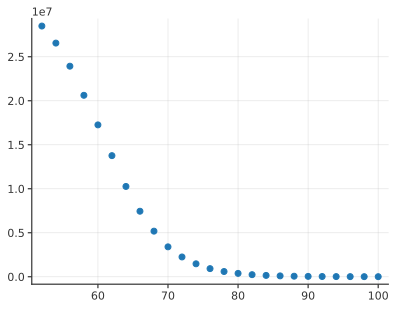

In [13]:
def db_to_power_scalar(dB):
    return 10**(dB/10)



plt.plot(dBs, count_rates, "o")


power_scalar = 1/db_to_power_scalar(dBs)
power_scalar = power_scalar/power_scalar[0]
power_scalar


power_scalar2 = 1/db_to_power_scalar(dBs2)
power_scalar2 = power_scalar2/power_scalar2[0]
power_scalar2


In [11]:
len(power_scalar)

25

In [14]:
eff_efficiencies = count_rates/(power_scalar*count_rates[0])
eff_efficiencies = eff_efficiencies/np.average(eff_efficiencies[5:9])


eff_efficiencies2 = count_rates2/(power_scalar2*count_rates2[0])
eff_efficiencies2 = eff_efficiencies2/np.average(eff_efficiencies2[5:9])

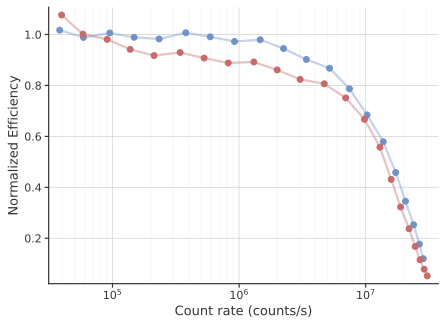

In [19]:
# plt.plot(dBs, eff_efficiencies, "o")
# ax = plt.gca()

fig, ax = plt.subplots(1,1, figsize=(7,5))
# ax.plot(dBs[5:], eff_efficiencies[5:], "o", color=Colors['blue'])
# ax.invert_xaxis()

ax.plot(count_rates[5:], eff_efficiencies[5:], "o", color=Colors['blue'])
ax.plot(count_rates[5:], eff_efficiencies[5:], color=Colors['blue'], alpha=0.4)

ax.plot(count_rates2[5:], eff_efficiencies2[5:], "o", color=Colors['red'])
ax.plot(count_rates2[5:], eff_efficiencies2[5:], color=Colors['red'], alpha=0.4)

ax.set_xscale("log")
ax.grid(True, which="minor", ls="-", alpha=0.15)
ax.grid(True, which="major", ls="-", alpha=0.5)
ax.set_xlabel("Count rate (counts/s)")
ax.set_ylabel("Normalized Efficiency")

d = {}
d["count_rates"] = count_rates.tolist()
d["eff_efficiencies"] = eff_efficiencies.tolist()
d["count_rates2"] = count_rates2.tolist()
d["eff_efficiencies2"] = eff_efficiencies2.tolist()

with open("mcr.json", 'w') as file:
    json.dump(d, file)
